In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product
from pathlib import Path 
import datetime
from write_output import plot_domestic_emissions, domestic_emissions_barplot, absolute_emissions_barplot, save_fig, parse_outputs, post_processing_new_consumer, parse_emissions, emissions_breakdown_barplot
import logging
import seaborn as sns 
logging.getLogger('matplotlib').setLevel(logging.WARNING)


# Final code

### Sufficiency: reference

In [2]:
folder_simus = Path('outputs/simulations_20240503')


In [7]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='reference', file_selection='reference')

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector'], folderpath=folder_simus)

In [8]:
domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation')*100, figsize=(11,7), save=folder_simus / Path('domestic_emissions'), rotation=45, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [9]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('energy', level='Sector')*1e-3, sector='energy',
                           save=folder_simus / Path('absolute_emissions'), y_min=-150, y_max=60, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, label_y_offset=10, filesuffix='.png')

In [10]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('food', level='Sector')*1e-3, sector='food',
                           save=folder_simus / Path('absolute_emissions'), y_min=-150, y_max=60, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, label_y_offset=10, filesuffix='.png')

In [11]:
# Breakdown of emissions reduction across sectors and types

emissions_breakdown_barplot(df=emissions_detail_df.xs('EUR_ref', level='Country', axis=1)*100, groupby='Sector', figsize=(11,7), save=folder_simus / Path('emissions_breakdown_ref'), filesuffix='.png')

In [5]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_energyservices')

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Low', 'Ref', 'High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_kappa'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [42]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_durable', configref={'kappa': 0.5, 'nu': 0.001})

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Very Low', 'Low', 'Ref'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_rho'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [43]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_production', configref={'kappa': 0.5, 'rho': 0.9})

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Ref', 'High', 'Very High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_nu'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

### Efficiency

In [44]:
folder_simus = Path('outputs/simulations_20240501')
d = parse_outputs(folder=folder_simus, list_sectors=['efficiency'], post_processing='reference')

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector'], folderpath=folder_simus)

In [45]:
domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation')*100, figsize=(11,7), save=folder_simus / Path('domestic_emissions_efficiency'), rotation=45, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [46]:
d = parse_outputs(folder=folder_simus, list_sectors=['efficiency'], post_processing='sensitivity_energyservices')

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['efficiency'], level='Sector').reindex(['Low', 'Ref', 'High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_kappa_efficiency'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [47]:
d = parse_outputs(folder=folder_simus, list_sectors=['efficiency'], post_processing='sensitivity_durable', configref={'kappa': 0.5, 'nu': 0.001})

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['efficiency'], level='Sector').reindex(['Very Low', 'Low', 'Ref'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_rho_efficiency'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [48]:
d = parse_outputs(folder=folder_simus, list_sectors=['efficiency'], post_processing='sensitivity_production', configref={'kappa': 0.5, 'rho': 0.9})

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['efficiency'], level='Sector').reindex(['Ref', 'High', 'Very High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_nu_efficiency'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

### Uniform shock

In [11]:
folder_simus = Path('outputs/simulations_20240502')  # uniform shock


In [12]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='reference', file_selection='uniform')

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector'], folderpath=folder_simus)

In [13]:
domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation')*100, figsize=(11,7), save=folder_simus / Path('domestic_emissions'), rotation=45, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [14]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('energy', level='Sector')*1e-3, sector='energy',
                           save=folder_simus / Path('absolute_emissions'), y_min=-1000, y_max=60, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, label_y_offset=60, filesuffix='.png')

In [15]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('food', level='Sector')*1e-3, sector='food',
                           save=folder_simus / Path('absolute_emissions'), y_min=-1500, y_max=200, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, label_y_offset=70, filesuffix='.png')

In [14]:
# Breakdown of emissions reduction across sectors and types

emissions_breakdown_barplot(df=emissions_detail_df.xs('EUR_ref', level='Country', axis=1)*100, groupby='Sector', figsize=(11,7), save=folder_simus / Path('emissions_breakdown_ref'), filesuffix='.png')

In [17]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_energyservices')

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Low', 'Ref', 'High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_kappa'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [9]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_durable', configref={'kappa': 0.5, 'nu': 0.001})

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Very Low', 'Low', 'Ref'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_rho'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

In [0]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_production', configref={'kappa': 0.5, 'rho': 0.9})

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Ref', 'High', 'Very High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_nu'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20, filesuffix='.png')

### Heterogeneity

In [18]:
folder_simus = Path('outputs/simulations_20240503')

d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='reference', file_selection='heterogeneous')
# d_postprocess = post_processing_new_consumer(d)
emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Share', 'Elasticity'], folderpath=folder_simus)

In [20]:
emissions_df.shape 

(1512,)

In [23]:
tmp = emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect').xs('food', level='Sector')*100
tmp.index = tmp.index.set_levels([level.astype(float) for level in tmp.index.levels])
tmp = tmp.unstack()
tmp = tmp.sort_index().sort_index(axis=1)
tmp 

Elasticity,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Share,,,,,,,,,
0.00,-1.487933e+00,-1.464501e+00,-1.444332e+00,-1.426702e+00,-1.411104e+00,-1.397175e+00,-1.384638e+00,-1.373279e+00,-1.362929e+00
0.05,-1.395455e+00,-1.373434e+00,-1.354486e+00,-1.337919e+00,-1.323265e+00,-1.310178e+00,-1.298399e+00,-1.287727e+00,-1.278002e+00
0.10,-1.304927e+00,-1.284293e+00,-1.266536e+00,-1.251018e+00,-1.237290e+00,-1.225029e+00,-1.213995e+00,-1.203999e+00,-1.194890e+00
0.15,-1.216308e+00,-1.197038e+00,-1.180455e+00,-1.165962e+00,-1.153144e+00,-1.141696e+00,-1.131393e+00,-1.122059e+00,-1.113553e+00
0.20,-1.129568e+00,-1.111636e+00,-1.096206e+00,-1.082720e+00,-1.070793e+00,-1.060143e+00,-1.050558e+00,-1.041873e+00,-1.033960e+00
0.25,-1.044678e+00,-1.028060e+00,-1.013761e+00,-1.001265e+00,-9.902125e-01,-9.803456e-01,-9.714639e-01,-9.634173e-01,-9.560857e-01
0.30,-9.614082e-01,-9.462816e-01,-9.330969e-01,-9.215726e-01,-9.113797e-01,-9.022783e-01,-8.940875e-01,-8.866684e-01,-8.799067e-01
0.35,-8.803704e-01,-8.663030e-01,-8.542017e-01,-8.436279e-01,-8.342769e-01,-8.259275e-01,-8.184134e-01,-8.116060e-01,-8.054037e-01
0.40,-8.009216e-01,-7.880938e-01,-7.770595e-01,-7.674186e-01,-7.588931e-01,-7.512809e-01,-7.444304e-01,-7.382244e-01,-7.325701e-01


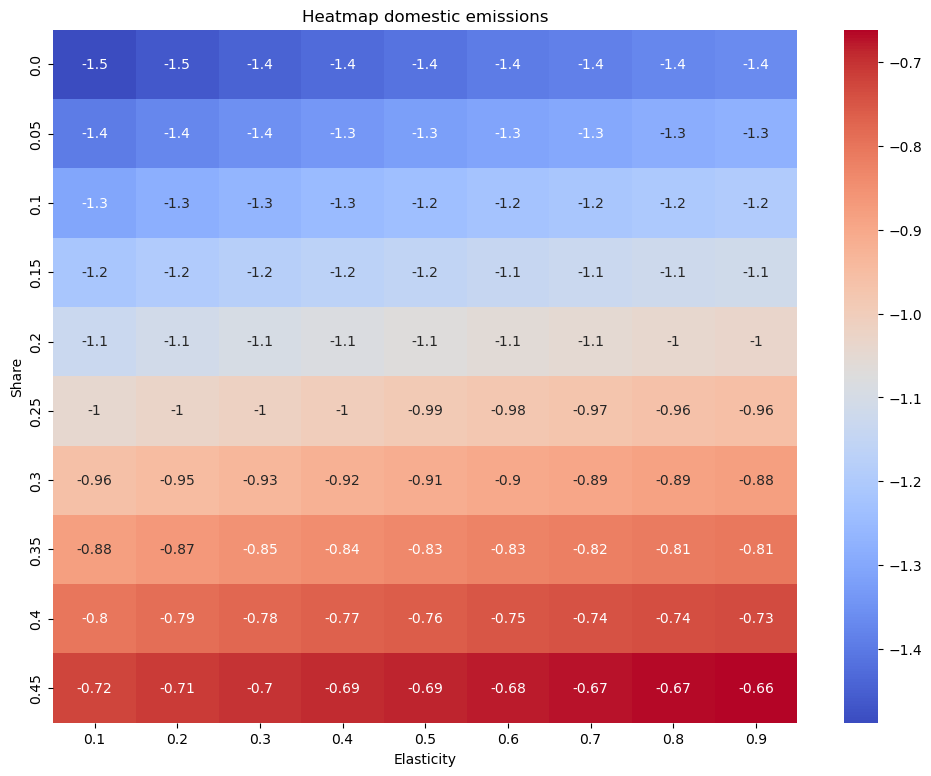

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(12,9))
sns.heatmap(tmp.loc[tmp.index < 0.5], annot=True, cmap='coolwarm')  # 'annot=True' to annotate cells with numeric data
plt.title('Heatmap domestic emissions')
fig.savefig('outputs/simulations_20240503/domestic_emissions_heatmap.png')
plt.show()

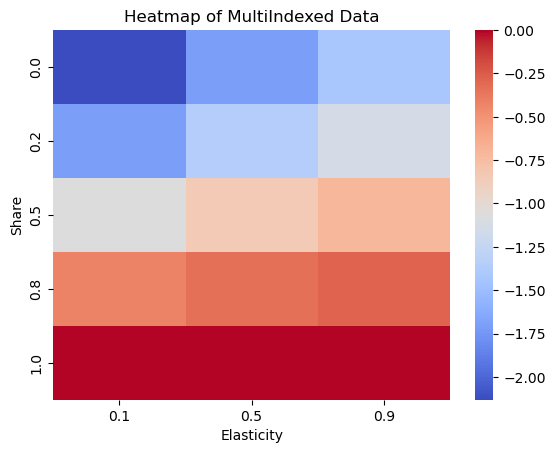

In [15]:
sns.heatmap(tmp, annot=False, cmap='coolwarm')  # 'annot=True' to annotate cells with numeric data
plt.title('Heatmap of MultiIndexed Data')
plt.show()

### Old code

In [2]:
d = {
    # 'Food': Path('outputs/new_simus/EUR_food_new_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.001_kappa0.5_rho0.95.xlsx'),
    'Food': Path('outputs/new_simus/EUR_food2_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.001_kappa0.5_rho0.95.xlsx'),
    'Energy': Path('outputs/new_simus/EUR_energy_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.001_kappa0.5_rho0.95.xlsx'),
    # 'Comprehensive': Path('outputs/new_simus/EUR_combined2_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.001_kappa0.5_rho0.95.xlsx')
}
emissions_df, emissions_absolute_df = parse_emissions(d, index_names=['Sector'], folderpath=Path('outputs/new_simus/'))

In [3]:
domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation')*100, figsize=(11,7), save='outputs/new_simus/domestic_emissions', rotation=45, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20)

In [7]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Energy', level='Sector')*1e-3, sector='energy',
                           save='outputs/new_simus/absolute_emissions', y_min=-420, y_max=150, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20)

In [8]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Food', level='Sector')*1e-3, sector='food2', save='outputs/new_simus/absolute_emissions', y_min=-420, y_max=150, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20)

In [38]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Comprehensive', level='Sector')*1e-3, sector='combined2', save='outputs/new_simus/absolute_emissions', y_min=-420, y_max=150, fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20)

In [16]:
d = {
    'Food': Path('outputs/new_simus/EUR_food_new_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.001_kappa0.1_rho0.1.xlsx'),
    'Energy': Path('outputs/new_simus/EUR_energy_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.001_kappa0.1_rho0.1.xlsx')
}
emissions_df, emissions_absolute_df = parse_emissions(d, index_names=['Sector'], folderpath=Path('outputs/new_simus/'))

In [17]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Energy', level='Sector')*1e-3, sector='energy',
                           save='outputs/new_simus/absolute_emissions_lowelasticity')

In [18]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Food', level='Sector')*1e-3, sector='food', save='outputs/new_simus/absolute_emissions_lowelasticity', y_min=-320, y_max=100)

## Uniform shock

In [22]:
d = {
    'Food': Path('outputs/new_simus/EUR_food_new_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9_rho0.95_uniform.xlsx'),
    'Energy': Path('outputs/new_simus/EUR_energy_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9_rho0.95_uniform.xlsx'),
}
emissions_df, emissions_absolute_df = parse_emissions(d, index_names=['Sector'], folderpath=Path('outputs/new_simus/'))

In [25]:
domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation')*100, figsize=(10,7), save='outputs/new_simus/domestic_emissions_uniform', rotation=45)

In [23]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Food', level='Sector')*1e-3, sector='food',
                           save='outputs/new_simus/absolute_emissions_uniform')

In [24]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Energy', level='Sector')*1e-3, sector='energy',
                           save='outputs/new_simus/absolute_emissions_uniform')

## Sensitivity

In [5]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_energyservices')

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Low', 'Ref', 'High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_kappa'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20)

ValueError: Worksheet named 'emissions_detail' not found

In [10]:
d = parse_outputs(folder=folder_simus, list_sectors=['food', 'energy'], post_processing='sensitivity_durable', configref={'kappa': 0.5})

emissions_df, emissions_absolute_df, emissions_detail_df = parse_emissions(d, index_names=['Sector', 'Elasticity'], folderpath=folder_simus)
emissions_df = emissions_df.reindex(['food', 'energy'], level='Sector').reindex(['Low', 'Ref', 'High'], level='Elasticity')

domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation').xs('D+CD+CES', level='Effect')*100, first_level_index='Sector', second_level_index='Elasticity', figsize=(10,7), save=folder_simus / Path('domestic_emissions_sensitivity_rho'), rotation=45,
                           fontsize_annotation=15, fontsize_small_xlabel=15, fontsize_big_xlabel=18, annot_offset_neg=-20)

# Data

In [17]:
# Generate random data
index = pd.MultiIndex.from_tuples(
    product(("France", "USA"), ("Food", "Mobility"), ("D", "D+P", "D+P+S ")),
    names=['Country', 'Sector', 'Category']
)

np.random.seed(0)  # for reproducibility
data = [-0.9, -1.1, -0.5, -2.6, -2.5, -2.3, - 0.52, -0.79, -0.23, -1.7, -1.3, -0.9]
# data = -np.random.rand(len(index))
series = pd.Series(data, index=index)


In [9]:
series.iloc[0]

-0.9

In [3]:
# Specific shock
index = pd.MultiIndex.from_tuples(
    product(("Europe", "France"), ("Food", "Mobility"), ("D", "D+CD", "D+CD+CES ")),
    names=['Country', 'Sector', 'Category']
)

np.random.seed(0)  # for reproducibility
data = [-0.62, -0.33, -0.34, 
        -1.6, -0.79, -1.0, 
        - 0.91, -0.57, -0.54, 
        -1.6, -1.3, -1.4]
# data = -np.random.rand(len(index))
series = pd.Series(data, index=index)
series

Country  Sector    Category 
Europe   Food      D           -0.62
                   D+CD        -0.33
                   D+CD+CES    -0.34
         Mobility  D           -1.60
                   D+CD        -0.79
                   D+CD+CES    -1.00
France   Food      D           -0.91
                   D+CD        -0.57
                   D+CD+CES    -0.54
         Mobility  D           -1.60
                   D+CD        -1.30
                   D+CD+CES    -1.40
dtype: float64

In [26]:
# Overall shock
index = pd.MultiIndex.from_tuples(
    product(("Europe", "France"), ("Food", "Mobility"), ("D", "D+CD", "D+CD+CES ")),
    names=['Country', 'Sector', 'Category']
)

np.random.seed(0)  # for reproducibility
data = [-0.69, -0.43, -0.44, 
        -1.6, -0.22, -0.32, 
        - 0.91, -0.57, -0.54, 
        -1.6, -1.3, -1.4]
# data = -np.random.rand(len(index))
series = pd.Series(data, index=index)
series

Country  Sector    Category 
Europe   Food      D           -0.69
                   D+CD        -0.43
                   D+CD+CES    -0.44
         Mobility  D           -1.60
                   D+CD        -0.22
                   D+CD+CES    -0.32
France   Food      D           -0.91
                   D+CD        -0.57
                   D+CD+CES    -0.54
         Mobility  D           -1.60
                   D+CD        -1.30
                   D+CD+CES    -1.40
dtype: float64

In [4]:
n_countries = series.index.get_level_values("Country").nunique()
n_sectors = series.index.get_level_values("Sector").nunique()
n_categories = series.index.get_level_values("Category").nunique()
min_value = series.min()

In [5]:
min_value

-1.6

In [6]:
# Optional preamble, for latex-looking figures 

import os
# Get path with the command `which latex`
os.environ["PATH"] = "/Library/TeX/texbin:$PATH"
plt.rcParams.update({
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"],
    # To have access to AMS maths commands
    'text.latex.preamble': r'\usepackage{amsmath}',
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 8,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
})

# 1 fig per column

In [36]:
# Some sizes in the plot, see figure for details 

# Size of blank space over size of ensemble of categories
ratio_space = 0.3

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank 
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels 
y_text_offset = 0.15
y_label_categories = 0.25
y_label_sector = 0.60

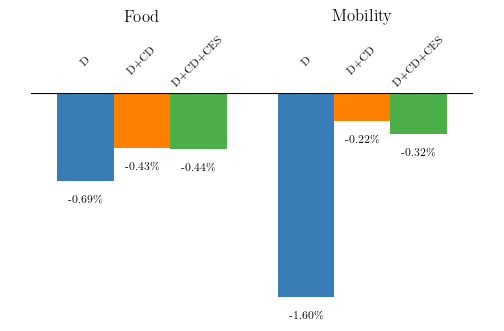

In [37]:
## Select the country 
country = 'Europe'
s_country = series.xs(country, level='Country')

## The ax: we plot a single black line from 0 to 1 

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(450/72, 200/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis
ax.plot([0, 1], [0, 0], color='black')

## Select the palette 

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(), 
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset 
current_x = size_blank / 2 

# For each sector... 
for ind_sector, sector in enumerate(s_country.index.get_level_values("Sector").unique()):
    # Restrict the dataframe 
    s_sector = s_country.xs(sector, level="Sector")
    # Print the name of the sector: 
    # Leave half a blank, then multiple sectors, then multiple full blanks 
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), y_label_sector, sector, 
            **text_align, fontsize=12)
    
    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot 
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")
        
        # This is the label 
        ax.text(current_x + size_categories / 2, y_label_categories, category, rotation=45, 
                **text_align)
                # ax.text(current_x + size_categories / 2, y_label_categories, category, 
                # horizontalalignment="center", verticalalignment="bottom", rotation=45, fontsize=7)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y - y_text_offset, f"{current_y:.2f}\\%", **text_align)
        # Next plot will be a bit further
        current_x += size_categories
    
    # We skip a blank 
    current_x += size_blank

fig.savefig(f"output_{country}_022024_single.pdf", transparent=True, bbox_inches='tight', pad_inches=0)


# Processing

In [2]:
d = {
    'EUR - Food': Path('outputs/new_simus/EUR_food_new_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9_rho0.95.xlsx'),
    'EUR - Energy': Path('outputs/new_simus/EUR_energy_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9_rho0.95.xlsx'),
}

emissions_df, emissions_absolute_df, welfare_df = process_output(d, folderpath=Path('outputs/new_simus/'))

In [3]:
domestic_emissions_barplot(emissions_df.xs('EUR', level='Aggregation')*100, figsize=(10,7), save=Path('outputs/new_simus'), rotation=45)

In [3]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Energy', level='Sector')*1e-3, sector='energy',
                           save=Path('outputs/new_simus'))

In [5]:
absolute_emissions_barplot(emissions_absolute_df.xs('EUR', level='Aggregation').xs('Food', level='Sector')*1e-3, sector='food', save=Path('outputs/new_simus'),
                           label_y_offset=5)

In [2]:
d = {
    'EUR - Food': Path('outputs/EUR_food_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9.xlsx'),
    'FRA - Food': Path('outputs/FRA_food_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9.xlsx'),
    'EUR - Mobility': Path('outputs/EUR_distance_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9.xlsx'),
    'FRA - Mobility': Path('outputs/FRA_distance_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.9_kappa0.9.xlsx')
}
d = {
    'EUR - Food': Path('outputs/EUR_food_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.8_kappa0.8.xlsx'),
    'FRA - Food': Path('outputs/FRA_food_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.8_kappa0.8.xlsx'),
    'EUR - Mobility': Path('outputs/EUR_distance_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.8_kappa0.8.xlsx'),
    'FRA - Mobility': Path('outputs/FRA_distance_theta0.5_sigma0.9_epsilon0.001_delta0.9_mu0.9_nu0.8_kappa0.8.xlsx')
}
emissions_df, emissions_absolute_df, welfare_df = process_output(d)

ValueError: Worksheet named 'labor_capital' not found

KeyboardInterrupt: 

## Rebound effect with IO

2024-03-08 18:25:55,690 - DEBUG - Assigning font /F1 = '/Users/celia/miniforge3/envs/networks/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2024-03-08 18:25:55,696 - DEBUG - Embedding font /Users/celia/miniforge3/envs/networks/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2024-03-08 18:25:55,696 - DEBUG - Writing TrueType font.


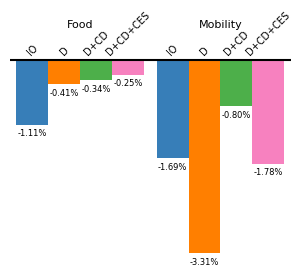

In [36]:
series = pd.read_excel('outputs/emissions.xlsx', index_col=[0,1, 2]).squeeze()
series = series*100

n_countries = series.index.get_level_values("Country").nunique()
n_sectors = series.index.get_level_values("Sector").nunique()
n_categories = series.index.get_level_values("Category").nunique()
min_value = series.min()

# Some sizes in the plot, see figure for details 

# Size of blank space over size of ensemble of categories
ratio_space = 0.1

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank 
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels 
y_text_offset = 0.15
y_label_categories = 0.05
y_label_sector = 0.60

## Select the country 
country = "EUR"
s_country = series.xs(country, level='Country')

## The ax: we plot a single black line from 0 to 1 

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(202/72, 200/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis

# Some tricks in order to avoid the axis to change position between the two countries
ax.plot([0, 1], [0, 0], color='black')
ax.plot([0, 0], [0, min_value], color="white", alpha=0)
plt.ylim(min_value, 0.5)
plt.xlim(0, 1)
plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)

## Select the palette 

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(), 
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset 
current_x = size_blank / 2 

# For each sector... 
for ind_sector, sector in enumerate(s_country.index.get_level_values("Sector").unique()):
    # Restrict the dataframe 
    s_sector = s_country.xs(sector, level="Sector")
    # Print the name of the sector: 
    # Leave half a blank, then multiple sectors, then multiple full blanks 
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), y_label_sector, sector, 
            **text_align, fontsize=8)
    
    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot 
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")
        
        # This is the label 
        ax.text(current_x + size_categories / 2, y_label_categories, category, 
                horizontalalignment="center", verticalalignment="bottom", rotation=45, fontsize=7)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y - y_text_offset, f"{current_y:.2f}%", 
                **text_align, fontsize=6, rotation=0)
        # Next plot will be a bit further
        current_x += size_categories
    
    # We skip a blank 
    current_x += size_blank

# fig.savefig(f"output_{country}.pdf", transparent=True, bbox_inches=Bbox([[0, min_value], [1, 0.5]]), pad_inches=0)
d = datetime.datetime.now().strftime("%m%d%H%M%S")
fig.savefig(f"graphs/output_{country}_{d}.pdf", transparent=True, bbox_inches=None, pad_inches=0)

In [9]:
colors

{'IO': '#377eb8', 'D': '#ff7f00', 'D+CD': '#4daf4a', 'D+CD+CES': '#f781bf'}

## 2 figs side by side

In [4]:
series = pd.read_excel('outputs/emissions.xlsx', index_col=[0,1, 2]).squeeze()
series = series*100
series 

Country  Sector    Category
EUR      Food      IO         -1.113321
                   D          -0.612192
                   D+CD       -0.344109
                   D+CD+CES   -0.352664
FRA      Food      IO         -1.260245
                   D          -0.889980
                   D+CD       -0.565113
                   D+CD+CES   -0.532524
EUR      Mobility  IO         -1.688478
                   D          -1.579495
                   D+CD       -0.797183
                   D+CD+CES   -0.863802
FRA      Mobility  IO         -1.673059
                   D          -1.619758
                   D+CD       -1.268518
                   D+CD+CES   -1.312854
Name: 0, dtype: float64

In [5]:
n_countries = series.index.get_level_values("Country").nunique()
n_sectors = series.index.get_level_values("Sector").nunique()
n_categories = series.index.get_level_values("Category").nunique()
min_value = series.min()

In [6]:
# Some sizes in the plot, see figure for details 

# Size of blank space over size of ensemble of categories
ratio_space = 0.1

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank 
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels 
y_text_offset = 0.15
y_label_categories = 0.05
y_label_sector = 0.60

2024-03-08 11:54:26,717 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-08 11:54:26,718 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-08 11:54:26,721 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-03-08 11:54:26,722 - DEBUG - findfont: score(FontEntry(fname='/Users/celia/miniforge3/envs/networks/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2024-03-08 11:54:26,722 - DEBUG - findfont: score(FontEntry(fname='/Users/celia/miniforge3/envs/networks/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2024-03-08 11:54:26,722 - DEBUG - findfont: s

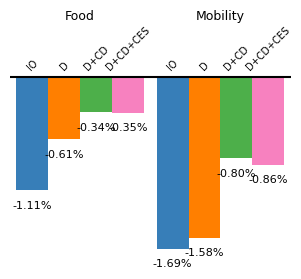

In [7]:
## Select the country 
country = "EUR"
s_country = series.xs(country, level='Country')

## The ax: we plot a single black line from 0 to 1 

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(202/72, 200/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis

# Some tricks in order to avoid the axis to change position between the two countries
ax.plot([0, 1], [0, 0], color='black')
ax.plot([0, 0], [0, min_value], color="white", alpha=0)
plt.ylim(min_value, 0.5)
plt.xlim(0, 1)
plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)

## Select the palette 

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(), 
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset 
current_x = size_blank / 2 

# For each sector... 
for ind_sector, sector in enumerate(s_country.index.get_level_values("Sector").unique()):
    # Restrict the dataframe 
    s_sector = s_country.xs(sector, level="Sector")
    # Print the name of the sector: 
    # Leave half a blank, then multiple sectors, then multiple full blanks 
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), y_label_sector, sector, 
            **text_align, fontsize=9)
    
    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot 
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")
        
        # This is the label 
        ax.text(current_x + size_categories / 2, y_label_categories, category, 
                horizontalalignment="center", verticalalignment="bottom", rotation=45, fontsize=7)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y - y_text_offset, f"{current_y:.2f}%", 
                **text_align, fontsize=8, rotation=0)
        # Next plot will be a bit further
        current_x += size_categories
    
    # We skip a blank 
    current_x += size_blank

# fig.savefig(f"output_{country}.pdf", transparent=True, bbox_inches=Bbox([[0, min_value], [1, 0.5]]), pad_inches=0)
fig.savefig(f"graphs/output_{country}_032024.pdf", transparent=True, bbox_inches=None, pad_inches=0)


## Sensitivity

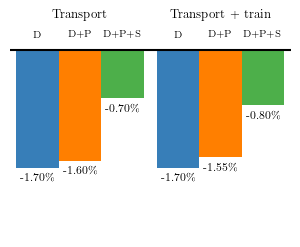

In [13]:
# Generate random data
index = pd.MultiIndex.from_tuples(
    product(("France", "USA"), ("Transport", "Transport + train"), ("D", "D+P", "D+P+S ")),
    names=['Country', 'Sector', 'Category']
)

np.random.seed(0)  # for reproducibility
data = [-2.7, -2.57, -2.2, -2.67, -2.5, -2.3, - 1.7, -1.6, -0.7, -1.7, -1.55, -0.8]
# data = -np.random.rand(len(index))
series = pd.Series(data, index=index)

n_countries = series.index.get_level_values("Country").nunique()
n_sectors = series.index.get_level_values("Sector").nunique()
n_categories = series.index.get_level_values("Category").nunique()
min_value = series.min()

# Some sizes in the plot, see figure for details

# Size of blank space over size of ensemble of categories
ratio_space = 0.1

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels
y_text_offset = 0.15
y_label_categories = 0.15
y_label_sector = 0.50

## Select the country
country = "USA"
s_country = series.xs(country, level='Country')

## The ax: we plot a single black line from 0 to 1

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(202/72, 200/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis

# Some tricks in order to avoid the axis to change position between the two countries
ax.plot([0, 1], [0, 0], color='black')
ax.plot([0, 0], [0, min_value], color="white", alpha=0)
plt.ylim(min_value, 0.5)
plt.xlim(0, 1)
plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)

## Select the palette

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(),
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset
current_x = size_blank / 2

# For each sector...
for ind_sector, sector in enumerate(s_country.index.get_level_values("Sector").unique()):
    # Restrict the dataframe
    s_sector = s_country.xs(sector, level="Sector")
    # Print the name of the sector:
    # Leave half a blank, then multiple sectors, then multiple full blanks
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), y_label_sector, sector,
            **text_align, fontsize=9)

    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")

        # This is the label
        ax.text(current_x + size_categories / 2, y_label_categories, category,
                horizontalalignment="center", verticalalignment="bottom", rotation=0, fontsize=7)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y - y_text_offset, f"{current_y:.2f}\\%",
                **text_align, fontsize=8, rotation=0)
        # Next plot will be a bit further
        current_x += size_categories

    # We skip a blank
    current_x += size_blank

# fig.savefig(f"output_{country}.pdf", transparent=True, bbox_inches=Bbox([[0, min_value], [1, 0.5]]), pad_inches=0)
fig.savefig(f"output_sensitivity_{country}.pdf", transparent=True, bbox_inches=None, pad_inches=0)


In [10]:
# Generate random data
index = pd.MultiIndex.from_tuples(
    product(("France", "USA"), ("Transport", "Transport + train"), ("D", "D+P", "D+P+S ")),
    names=['Country', 'Sector', 'Category']
)

np.random.seed(0)  # for reproducibility
data = [-2.7, -2.57, -2.2, -2.67, -2.5, -2.3, - 1.7, -1.6, -0.7, -1.7, -1.55, -0.8]
# data = -np.random.rand(len(index))
series = pd.Series(data, index=index)

n_countries = series.index.get_level_values("Country").nunique()
n_sectors = series.index.get_level_values("Sector").nunique()
n_categories = series.index.get_level_values("Category").nunique()
min_value = series.min()

# Some sizes in the plot, see figure for details

# Size of blank space over size of ensemble of categories
ratio_space = 0.3

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels
y_text_offset = 0.15
y_label_categories = 0.15
y_label_sector = 0.40

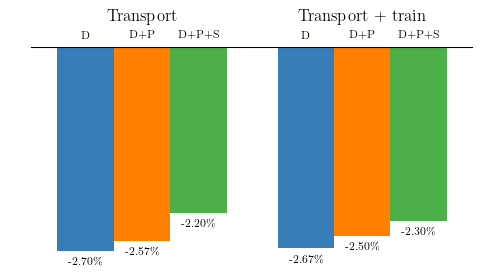

In [11]:
## Select the country
s_country = series.xs('France', level='Country')

## The ax: we plot a single black line from 0 to 1

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(450/72, 200/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis
ax.plot([0, 1], [0, 0], color='black')

## Select the palette

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(),
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset
current_x = size_blank / 2

# For each sector...
for ind_sector, sector in enumerate(s_country.index.get_level_values("Sector").unique()):
    # Restrict the dataframe
    s_sector = s_country.xs(sector, level="Sector")
    # Print the name of the sector:
    # Leave half a blank, then multiple sectors, then multiple full blanks
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), y_label_sector, sector,
            **text_align, fontsize=12)

    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")

        # This is the label
        ax.text(current_x + size_categories / 2, y_label_categories, category,
                **text_align)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y - y_text_offset, f"{current_y:.2f}\\%", **text_align)
        # Next plot will be a bit further
        current_x += size_categories

    # We skip a blank
    current_x += size_blank

fig.savefig(f"output_sensitivity.pdf", transparent=True, bbox_inches='tight', pad_inches=0)


In [5]:
pd.read_excel('outputs/emissions_absolute_df.xlsx', index_col=[0,1,2])

Effect             0
Country Sector   Category                        
EUR     Food     Dom.            IO -56904.194278
                 Dom.             D -31290.456357
                 Dom.          D+CD -17588.135722
                 Dom.      D+CD+CES -18025.427615
                 RoW             IO -18725.090063
                 RoW              D  -7536.783547
                 RoW           D+CD  -5810.242342
                 RoW       D+CD+CES  -3615.135201
FRA     Food     Dom.            IO  -5856.462260
                 Dom.             D  -4135.809591
                 Dom.          D+CD  -2626.125948
                 Dom.      D+CD+CES  -2474.683406
                 RoW             IO  -6594.759646
                 RoW              D  -2279.557141
                 RoW           D+CD    913.091264
                 RoW       D+CD+CES  -2256.500138
EUR     Mobility Dom.            IO -86301.734821
                 Dom.             D -80731.345764
                 Dom.          D+CD -40745.749543
                 Dom.      D+CD+CES -44150.743670
                 RoW             IO  -6696.565431
                 RoW              D   1801.336853
                 RoW           D+CD  44241.461691
                 RoW       D+CD+CES  50096.248434
FRA     Mobility Dom.            IO  -7774.838691
                 Dom.             D  -7527.146202
                 Dom.          D+CD  -5894.906719
                 Dom.      D+CD+CES  -6100.940035
                 RoW             IO  -1733.300943
                 RoW              D    141.801706
                 RoW           D+CD   7564.055969
                 RoW       D+CD+CES   8059.111023

## Emissions

In [40]:
series = pd.read_excel('outputs/emissions_absolute_df.xlsx', index_col=[0,1,2,3]).squeeze()
series = series / 1e3

series 

min_value, max_value = series.min(), series.max()
if max_value < 0:
    max_value = 0.1

n_countries = series.index.get_level_values("Country").nunique()
n_categories = series.index.get_level_values("Category").nunique()
min_value = series.min()

s = 'Mobility'
series = series.xs(s, level='Sector')
series = series.loc[series.index.get_level_values('Effect') != 'IO']   # we do not display absolute values for IO
n_sectors = series.index.get_level_values("Effect").nunique()

In [41]:
# Some sizes in the plot, see figure for details 

# Size of blank space over size of ensemble of categories
ratio_space = 0.2

# Half-Blank Sector1 Blank Sector2 ... SectorN Half-Blank 
size_sectors = 1 / (n_sectors + ratio_space * n_sectors )
size_blank = ratio_space * size_sectors

# For each sector, multiple categories displayed
size_categories = size_sectors / n_categories

# Amount of space between bars and labels 
y_text_offset = 10
y_label_categories = 10
y_label_sector_offset = 30

2024-03-08 18:28:18,917 - DEBUG - Assigning font /F1 = '/Users/celia/miniforge3/envs/networks/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
2024-03-08 18:28:18,922 - DEBUG - Embedding font /Users/celia/miniforge3/envs/networks/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
2024-03-08 18:28:18,922 - DEBUG - Writing TrueType font.


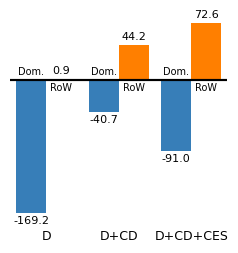

In [42]:
## Select the country 
country = "EUR"
s_country = series.xs(country, level='Country')

## The ax: we plot a single black line from 0 to 1 

# Get the textwidth from latex with \the\textwidth (or \showthe\textwidth).
fig, ax = plt.subplots(figsize=(202/72, 200/72))
ax.spines['left'].set_visible(False)  # hide the left spine
ax.spines['right'].set_visible(False)  # hide the right spine
ax.spines['bottom'].set_visible(False)  # hide the top spine
ax.spines['top'].set_visible(False)  # hide the top spine
ax.yaxis.set_visible(False)  # hide the y-axis
ax.xaxis.set_visible(False)  # hide the y-axis

# Some tricks in order to avoid the axis to change position between the two countries
ax.plot([0, 1], [0, 0], color='black')
# ax.plot([0, 0], [0, min_value], color="white", alpha=0)
plt.ylim(min_value - y_label_sector_offset, max_value)
plt.xlim(0, 1)
plt.axhline(y=0, color='black', linestyle='-')
# plt.subplots_adjust(left=0, right=1, top=0.9, bottom=0.1)

## Select the palette 

# A color-blind friendly palette
palette = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']
# Default palette
# palette = cm.tab10(9)

colors = {
    k: v for k, v in zip(
        s_country.index.get_level_values("Category").unique(), 
        palette)}

# Some keyword so that s in ax.text(x, y, s) is aligned around (x, y)
text_align = {
    "horizontalalignment": "center", "verticalalignment": "center"
}

# We start with a blank offset 
current_x = size_blank / 2 

# For each sector... 
for ind_sector, sector in enumerate(s_country.index.get_level_values("Effect").unique()):
    # Restrict the dataframe 
    s_sector = s_country.xs(sector, level="Effect")
    # Print the name of the sector: 
    # Leave half a blank, then multiple sectors, then multiple full blanks 
    ax.text(size_blank * (ind_sector + 0.5) + size_sectors * (ind_sector + 0.5), min_value - y_label_sector_offset, sector, 
            **text_align, fontsize=9)
    
    # For each category...
    for category in s_sector.index.get_level_values("Category").unique():
        # This is the value we plot 
        current_y = s_sector.loc[category]
        plt.bar(current_x, current_y, width=size_categories, color=colors[category], align="edge")
        
        # This is the label 
        ax.text(current_x + size_categories / 2, - y_label_categories * np.sign(current_y), category, 
                horizontalalignment="center", verticalalignment="center", rotation=0, fontsize=7)
        # This is the value, below the bar
        ax.text(current_x + size_categories / 2, current_y + np.sign(current_y) * y_text_offset, f"{current_y:.1f}", 
                **text_align, fontsize=8, rotation=0)
        # Next plot will be a bit further
        current_x += size_categories
    
    # We skip a blank 
    current_x += size_blank

# fig.savefig(f"output_emissions_{country}_{s}.pdf", transparent=True, bbox_inches=Bbox([[0, min_value], [1, max_value]]), pad_inches=0)
d = datetime.datetime.now().strftime("%m%d%H%M%S")
fig.savefig(f"graphs/output_emissions_{country}_{s}_{d}.pdf", transparent=True, bbox_inches=None, pad_inches=1)
